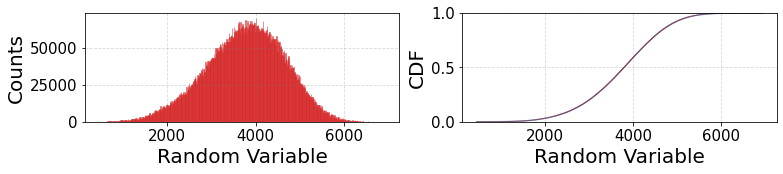

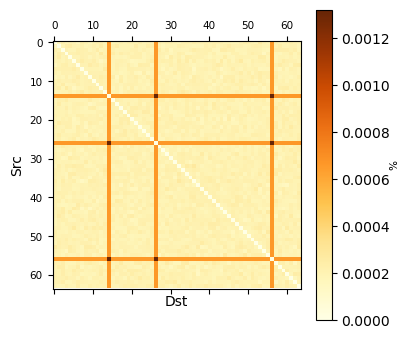

<Figure size 640x480 with 0 Axes>

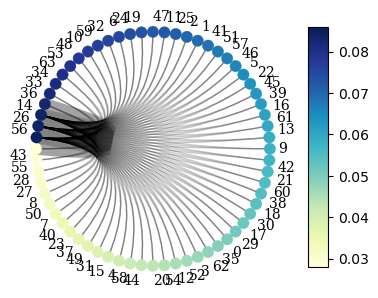

In [1]:
%load_ext autoreload
%autoreload
from trafpy.generator import Demand, DemandPlotter
import trafpy.generator as tpg
import time
import copy
from scipy.io import savemat


# set vars
N = 64
# path = r'C:/Users/benjo/Documents/Work/UCL/Workloads/'
endpoints = [str(i) for i in range(N)]
min_last_demand_arrival_time = None # 24000 timeslot units if it’s a 2000 epoch simulation
min_num_demands = 100
# LOADS = [0.1, 0.2, 0.3, 0.4, 0.5]
LOADS = [0.2]
# NUM_DEMANDS_FACTOR = 5
jensen_shannon_distance_threshold = 0.1

# init network
net = tpg.gen_arbitrary_network(ep_label=None, num_eps=N, server_to_rack_channel_capacity=100000, bidirectional_links=True)

# set any distributions you want to keep constant for all sets
flow_size_dist, _ = tpg.gen_named_val_dist(dist='weibull',
                                        params={'_alpha': 4.8, '_lambda': 4100},
                                        return_data=False,
                                        show_fig=True,
                                        round_to_nearest=0.1)

# interarrival_time_dist, _ = tpg.gen_named_val_dist(dist='weibull',
#                                                params={'_alpha': 3, '_lambda': 6},
#                                                return_data=False,
#                                                show_fig=True,
#                                                round_to_nearest=0.01)
interarrival_time_dist = {0.125: 1}

node_dist, _ = tpg.gen_multimodal_node_dist(eps=net.graph['endpoints'],
                                         skewed_nodes=[],
                                         skewed_node_probs=[0.25/(int(0.05*N)) for _ in range(int(0.05*N))],
                                         show_fig=True,
                                         num_skewed_nodes=int(len(endpoints)*0.05))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Generating load 0.2...


Packed 514231 flows in 1684.1083853244781 s.


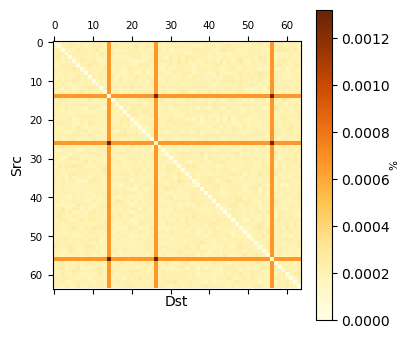

<Figure size 640x480 with 0 Axes>

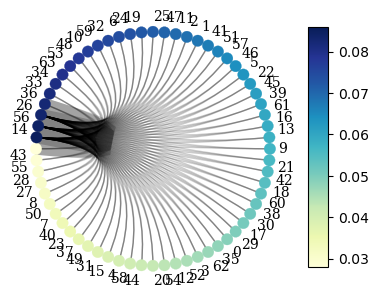

<Figure size 640x480 with 0 Axes>

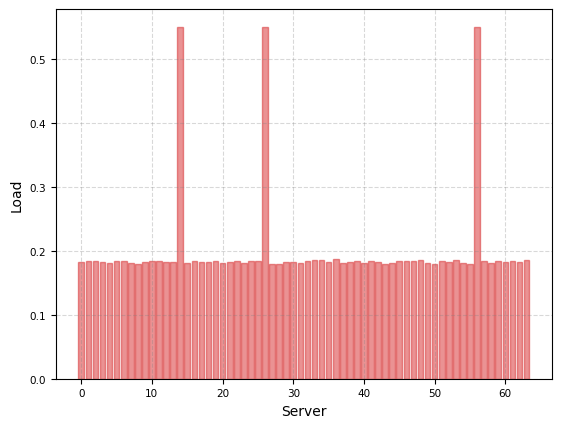

<Figure size 640x480 with 0 Axes>

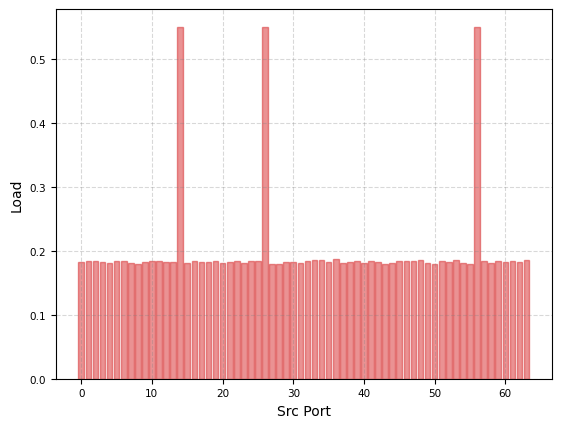

<Figure size 640x480 with 0 Axes>

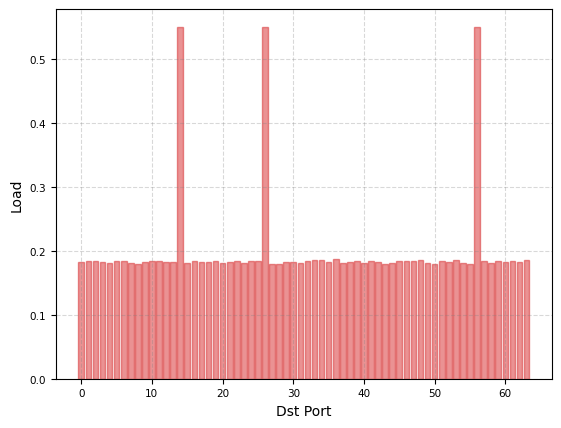

Generated load 0.2 in 1857.8260974884033 seconds.


In [2]:
%load_ext autoreload
%autoreload

for load in LOADS:
    print('Generating load {}...'.format(load))
    
    start = time.time()
    
    network_load_config = {'network_rate_capacity': net.graph['max_nw_capacity'], 
                           'ep_link_capacity': net.graph['ep_link_capacity'],
                           'target_load_fraction': load}
    flow_centric_demand_data = tpg.create_demand_data(eps=net.graph['endpoints'],
                                                      node_dist=node_dist,
                                                      flow_size_dist=flow_size_dist,
                                                      interarrival_time_dist=interarrival_time_dist,
                                                      network_load_config=network_load_config,
                                                      jensen_shannon_distance_threshold=jensen_shannon_distance_threshold,
                                                      min_num_demands=min_num_demands,
                                                      min_last_demand_arrival_time=min_last_demand_arrival_time,
                                                      check_dont_exceed_one_ep_load=True,
                                                      auto_node_dist_correction=False,
                                                      bidirectional_links=True,
                                                      print_data=True)

    demand = Demand(flow_centric_demand_data, net.graph['endpoints'])
    plotter = DemandPlotter(demand)
    plotter.plot_node_dist(eps=net.graph['endpoints'])
    plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=net.graph['ep_link_capacity'])
    
#     savemat("load{}_matlab_matrix.mat".format(load), flow_centric_demand_data)
    
    end = time.time()
    print('Generated load {} in {} seconds.'.format(load, end-start))

In [3]:
print(end-start)

1857.8260974884033
